#+TITLE: Data Augmentation
#+CATEGORIES: optimization
#+DESCRIPTION: A strategy used in machine learning to increase the diversity and amount of training data without actually collecting new data. It involves creating modified versions of existing data using techniques like rotation, scaling, flipping, cropping, and brightness or color adjustments.
#+DATE: 2020-01-02
#+HERO: /static/space-bg.png

# Overview

Data augmentation is a popular technique used to improve generalization performance. These strategies include rotation, scaling, flipping, cropping, and brightness or color adjustments.

It's a very reliable way to increase the size of small datasets and to encourage robust knowledge representations.

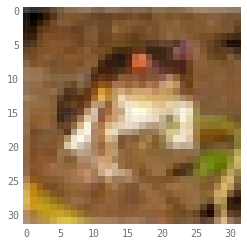

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision

plt.style.use('./deadneuron.mplstyle')

train_dataset = torchvision.datasets.CIFAR10("../data", train=True)
test_dataset = torchvision.datasets.CIFAR10("../data", train=False)

plt.imshow(train_dataset[0][0])

Different datasets and benchmarks have different standard transformations. The most common is mean standard normalization. These values are calculated over the training set. CIFAR projects tend to include random crop and random horizontal flip.

In [2]:
# 3 channel images with pixel values in [0,255]
raw_data = train_dataset.data
normalized_data = raw_data / 255.0

mean = normalized_data.mean(axis=(0,1,2))
std = normalized_data.std(axis=(0,1,2))

print(f"Mean: {mean}")
print(f"Std: {std}")

Mean: [0.49139968 0.48215841 0.44653091]
Std: [0.24703223 0.24348513 0.26158784]


Let's use a single image to demonstrate some transforms.

Text(0.5, 1.0, 'RGB Distribution')

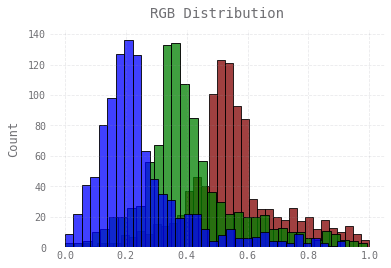

In [3]:
img = normalized_data[0]

sns.histplot(img[:, :, 0].flatten(), color="maroon")
sns.histplot(img[:, :, 1].flatten(), color="green")
sns.histplot(img[:, :, 2].flatten(), color="blue").set_title('RGB Distribution')

Text(0.5, 1.0, 'RGB Distribution')

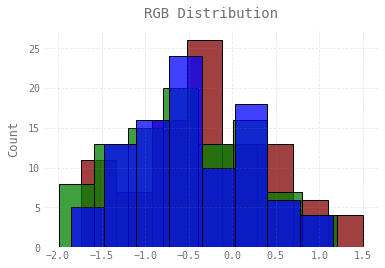

In [5]:
transforms = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize(mean, std)])

img_n = transforms(img)

sns.histplot(img_n[:, :, 0].flatten(), color="maroon")
sns.histplot(img_n[:, :, 1].flatten(), color="green")
sns.histplot(img_n[:, :, 2].flatten(), color="blue").set_title('RGB Distribution')

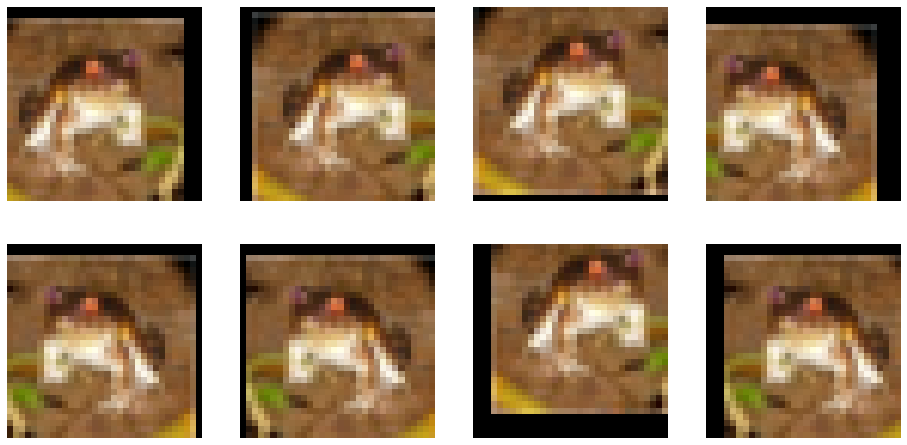

In [6]:
def plot_samples(img, transforms, rows=2, cols=4):
    imgs = [transforms(img) for _ in range(rows*cols)]
    
    fig, axs = plt.subplots(rows, cols, figsize=(cols*4,rows*4))
    
    for i in range(rows):
        for j in range(cols):
            axs[i,j].imshow(imgs[(cols*i)+j])
            axs[i,j].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    

transforms = torchvision.transforms.Compose(
    [torchvision.transforms.RandomCrop(32, padding=4),
     torchvision.transforms.RandomHorizontalFlip()])

img = train_dataset[0][0]
plot_samples(img, transforms, 2, 4)


Torchvision has a ton of these kinds of augmentations available.

AutoAugment implements a combination of random augmentations that were found to be the most optimal for different datasets. Torchvision includes policies for ImageNet, CIFAR10, and SVHN.

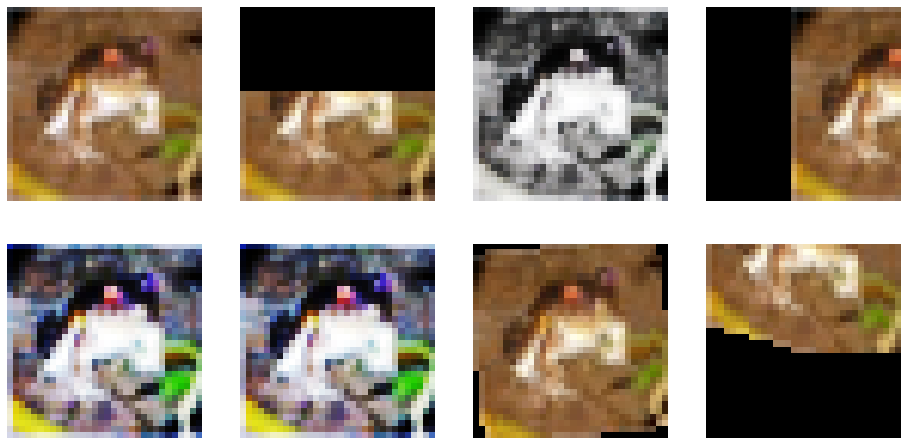

In [8]:
policy = torchvision.transforms.AutoAugmentPolicy.CIFAR10
transforms = torchvision.transforms.AutoAugment(policy)

plot_samples(img, transforms, 2, 4)